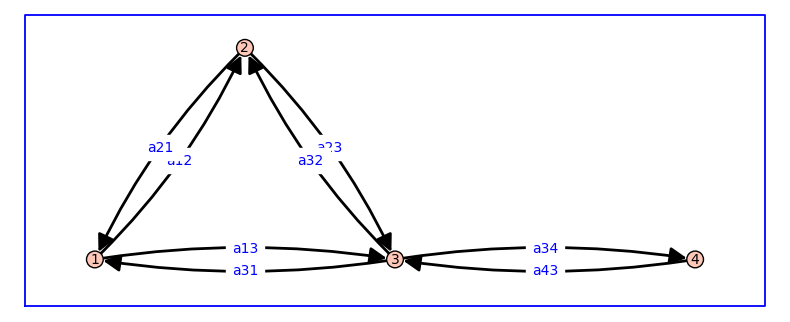

In [1]:
var('a12, a21, a13, a31, a23, a32, a34, a43')
d = {1: {2:a12, 3:a13}, 2: {1:a21, 3:a23}, 3: {2:a32, 1:a31, 4:a34}, 4: {3:a43}};
G = DiGraph(d,weighted=True)
vertex_positions = {1: (0, 0), 2: (1, 1.41), 3: (2, 0), 4: (4,0)}
G.plot(figsize=8,edge_labels=True,pos=vertex_positions,graph_border=True)

In [2]:
A = G.weighted_adjacency_matrix(sparse=False)
show(A)
print('The rank of A is', A.rank())

[  0 a12 a13   0]
[a21   0 a23   0]
[a31 a32   0 a34]
[  0   0 a43   0]

The rank of A is 4


In [3]:
Q = A - diagonal_matrix(sum(A.T))
show(Q)
print('The rank of Q is',Q.rank())

[      -a12 - a13              a12              a13                0]
[             a21       -a21 - a23              a23                0]
[             a31              a32 -a31 - a32 - a34              a34]
[               0                0              a43             -a43]

The rank of Q is 3


In [4]:
e = matrix([1,1,1,1]).T
print(Q*e)

[0]
[0]
[0]
[0]


In [5]:
var('p1 p2 p3 p4')
p = vector([p1, p2, p3, p4])
pQ = p*Q
eq =[]
for lhs in pQ:
    print(lhs == 0)
    eq.append(lhs == 0)

-(a12 + a13)*p1 + a21*p2 + a31*p3 == 0
a12*p1 - (a21 + a23)*p2 + a32*p3 == 0
a13*p1 + a23*p2 - (a31 + a32 + a34)*p3 + a43*p4 == 0
a34*p3 - a43*p4 == 0


In [6]:
print(Q.rank())

3


In [7]:
eq[-1] = p1+p2+p3+p4 == 1
for q in eq:
    print(q)

-(a12 + a13)*p1 + a21*p2 + a31*p3 == 0
a12*p1 - (a21 + a23)*p2 + a32*p3 == 0
a13*p1 + a23*p2 - (a31 + a32 + a34)*p3 + a43*p4 == 0
p1 + p2 + p3 + p4 == 1


In [8]:
z = solve(eq,list(p))
for i in range(4):
    f = z[0][i].rhs()
    print('p%s' % (i+1),'=',f.expand().factor())

p1 = (a21*a31 + a23*a31 + a21*a32)*a43/(a13*a21*a34 + a12*a23*a34 + a13*a23*a34 + a13*a21*a43 + a12*a23*a43 + a13*a23*a43 + a12*a31*a43 + a21*a31*a43 + a23*a31*a43 + a12*a32*a43 + a13*a32*a43 + a21*a32*a43)
p2 = (a12*a31 + a12*a32 + a13*a32)*a43/(a13*a21*a34 + a12*a23*a34 + a13*a23*a34 + a13*a21*a43 + a12*a23*a43 + a13*a23*a43 + a12*a31*a43 + a21*a31*a43 + a23*a31*a43 + a12*a32*a43 + a13*a32*a43 + a21*a32*a43)
p3 = (a13*a21 + a12*a23 + a13*a23)*a43/(a13*a21*a34 + a12*a23*a34 + a13*a23*a34 + a13*a21*a43 + a12*a23*a43 + a13*a23*a43 + a12*a31*a43 + a21*a31*a43 + a23*a31*a43 + a12*a32*a43 + a13*a32*a43 + a21*a32*a43)
p4 = (a13*a21 + a12*a23 + a13*a23)*a34/(a13*a21*a34 + a12*a23*a34 + a13*a23*a34 + a13*a21*a43 + a12*a23*a43 + a13*a23*a43 + a12*a31*a43 + a21*a31*a43 + a23*a31*a43 + a12*a32*a43 + a13*a32*a43 + a21*a32*a43)


In [9]:
def mysolve(p,Q):
    pQ = p*Q
    eq =[]
    for lhs in pQ:
       eq.append(lhs == 0)
    eq[-1] = p1+p2+p3+p4 == 1
    z = solve(eq,list(p))
    for i in range(4):
        f = z[0][i].rhs()
        print('p%s' % (i+1),'=',f.expand().factor())

In [10]:
Q = Q.subs(a31=a13*a32*a21/(a12*a23))
mysolve(p,Q)

p1 = a21*a32*a43/(a12*a23*a34 + a12*a23*a43 + a12*a32*a43 + a21*a32*a43)
p2 = a12*a32*a43/(a12*a23*a34 + a12*a23*a43 + a12*a32*a43 + a21*a32*a43)
p3 = a12*a23*a43/(a12*a23*a34 + a12*a23*a43 + a12*a32*a43 + a21*a32*a43)
p4 = a12*a23*a34/(a12*a23*a34 + a12*a23*a43 + a12*a32*a43 + a21*a32*a43)


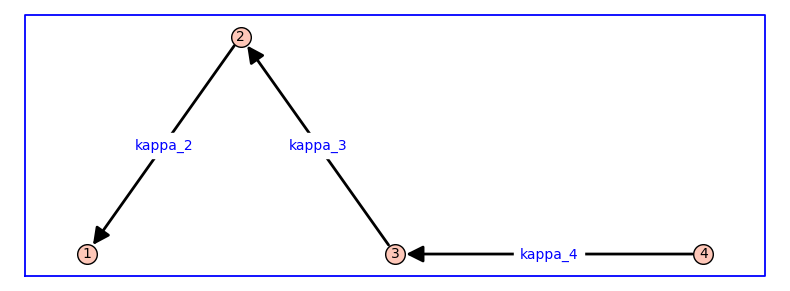

In [11]:
var('kappa_2, kappa_3, kappa_4')
d = {2: {1:kappa_2}, 3: {2:kappa_3}, 4: {3:kappa_4}};
G = DiGraph(d,weighted=True)
vertex_positions = {1: (0, 0), 2: (1, 1.41), 3: (2, 0), 4: (4,0)}
G.plot(figsize=8,edge_labels=True,pos=vertex_positions,graph_border=True)